In [ ]:
pip install --upgrade pip

In [ ]:
pip install xgboost

In [147]:
import xgboost

In [148]:
# importing the dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

Data Collection and processing

In [149]:
big_mart = pd.read_csv('C:/Users/DELL/OneDrive/Desktop/Project/ML/Big Mart/big_mart_data.csv')

In [99]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [100]:
big_mart.shape

(8523, 12)

In [101]:
big_mart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [102]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

##### Handling Missing values

In [103]:
# checking the distribution of Item_Weight
big_mart['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [104]:
big_mart['Item_Weight'].mean()

12.857645184135976

In [105]:
big_mart['Item_Weight'].median()

12.6

In [106]:
# filling the missing value
big_mart.fillna({'Item_Weight': big_mart['Item_Weight'].mean()}, inplace=True)

In [107]:
big_mart.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [108]:
mode_of_outlet_size = big_mart.pivot_table(values='Outlet_Size', columns ='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))

print(mode_of_outlet_size)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


In [109]:
missing_values = big_mart['Outlet_Size'].isnull()

print(missing_values)

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool


In [110]:
big_mart.loc[missing_values,'Outlet_Size'] = big_mart.loc[missing_values,'Outlet_Type'].apply(lambda x: mode_of_outlet_size[x])

In [111]:
big_mart.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Data Analysis

In [112]:
# statistsics
big_mart.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [113]:
sns.set_theme()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8096\521351363.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Visibility'])


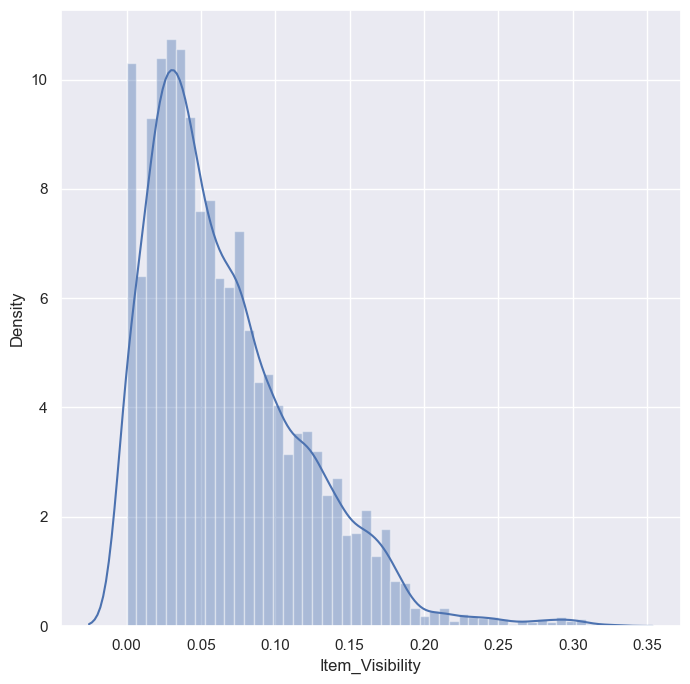

In [115]:
# item_visibility
plt.figure(figsize=(8,8))
sns.distplot(big_mart['Item_Visibility'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8096\3170128958.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_MRP'])


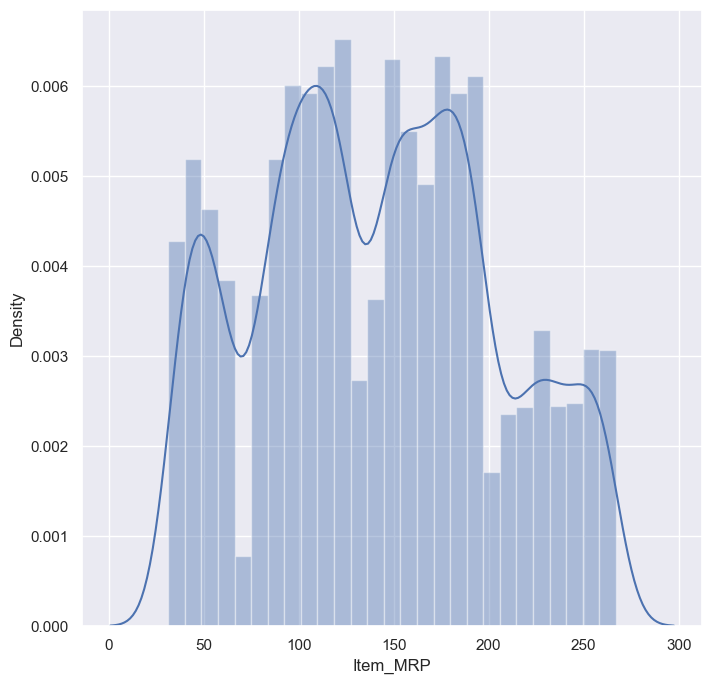

In [116]:
# item_visibility
plt.figure(figsize=(8,8))
sns.distplot(big_mart['Item_MRP'])
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_8096\2222442929.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart['Item_Outlet_Sales'])


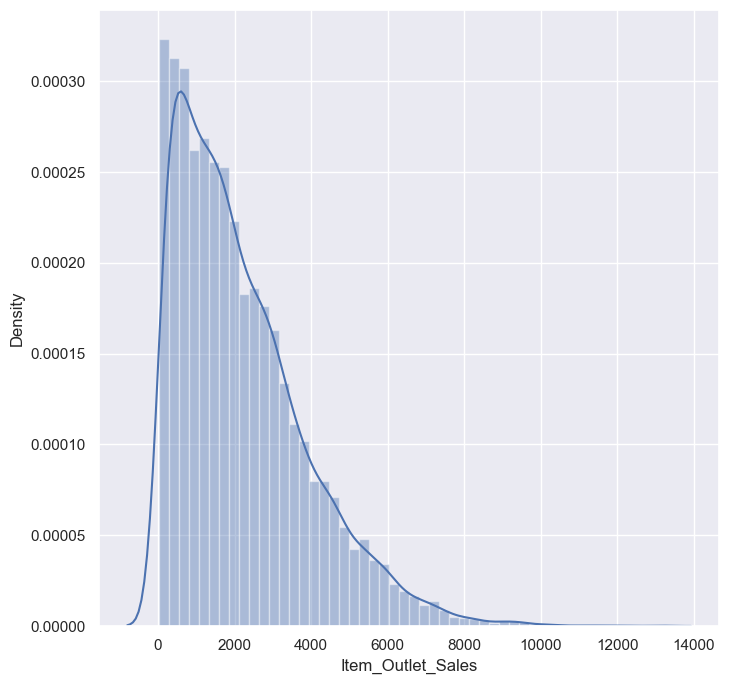

In [117]:
# item_outlet_sales
plt.figure(figsize=(8,8))
sns.distplot(big_mart['Item_Outlet_Sales'])
plt.show()

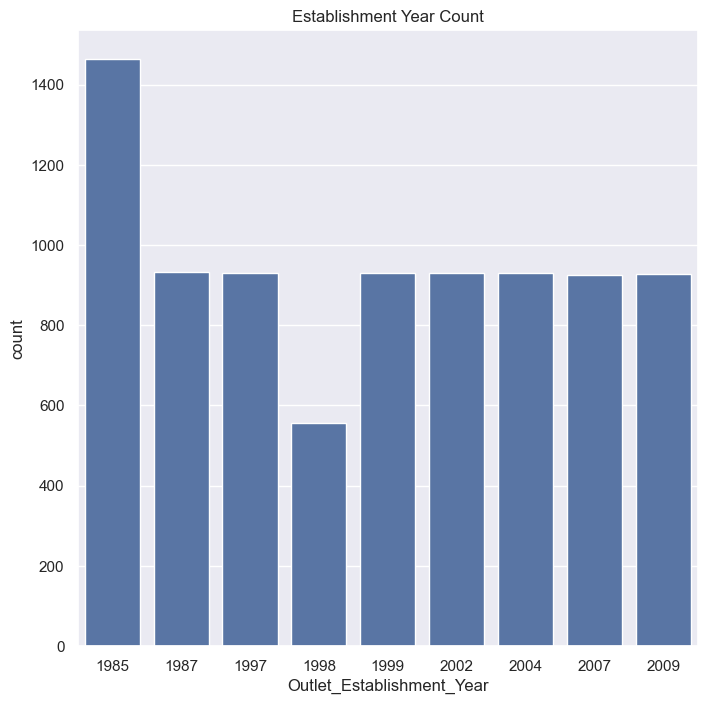

In [118]:
# Establishment Year
plt.figure(figsize=(8,8))
sns.countplot(data=big_mart, x='Outlet_Establishment_Year')
plt.title('Establishment Year Count')
plt.show()

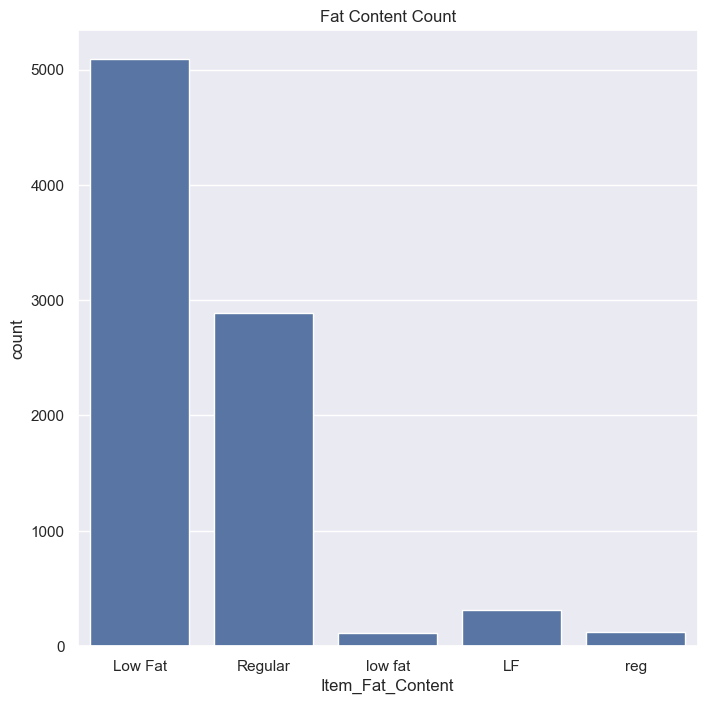

In [119]:
# Item Fat content
plt.figure(figsize=(8,8))
sns.countplot(data=big_mart, x='Item_Fat_Content')
plt.title('Fat Content Count')
plt.show()

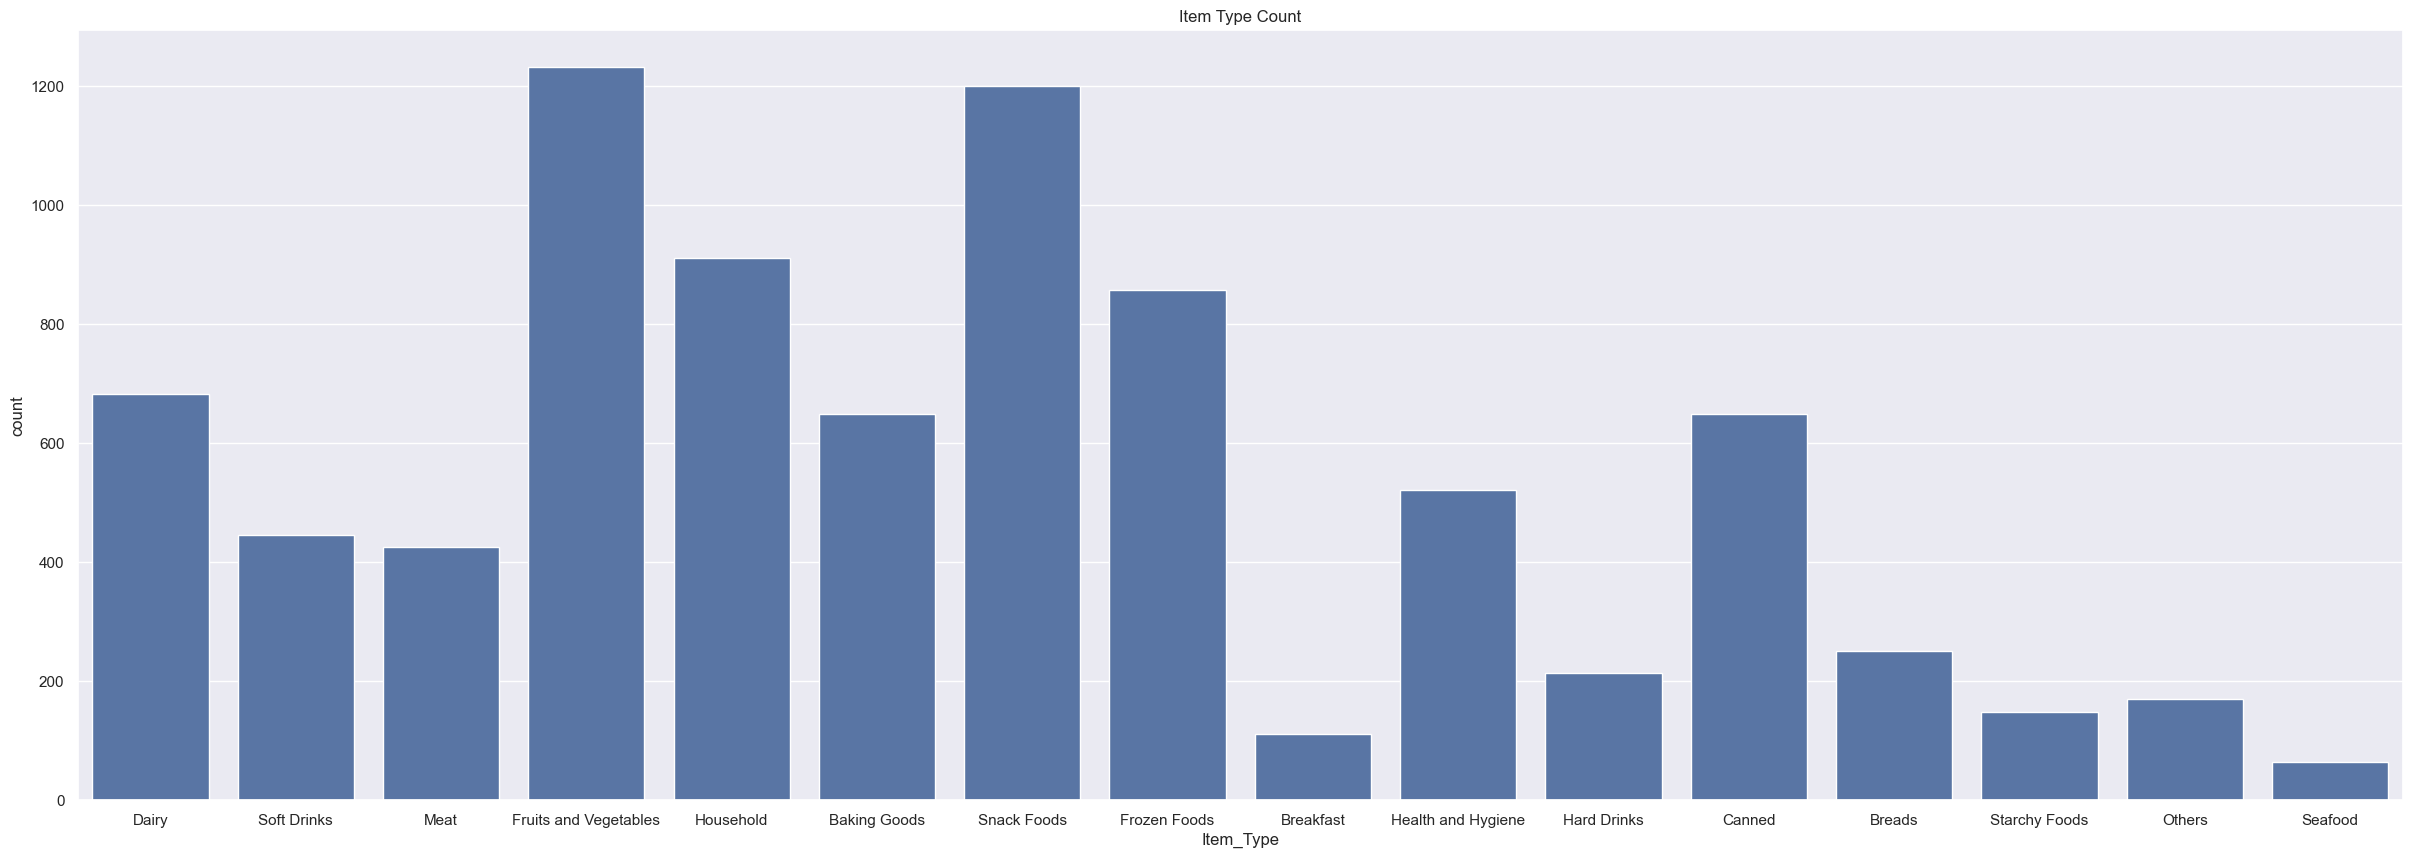

In [120]:
# Item Type
plt.figure(figsize=(30,10))
sns.countplot(data=big_mart, x='Item_Type')
plt.title('Item Type Count')
plt.show()

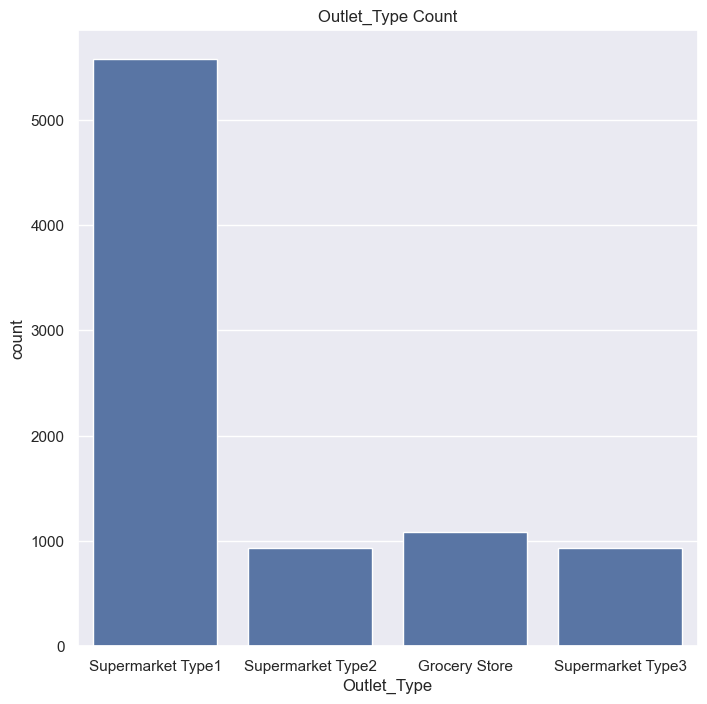

In [121]:
# Outlet Type
plt.figure(figsize=(8,8))
sns.countplot(data=big_mart, x='Outlet_Type')
plt.title('Outlet_Type Count')
plt.show()

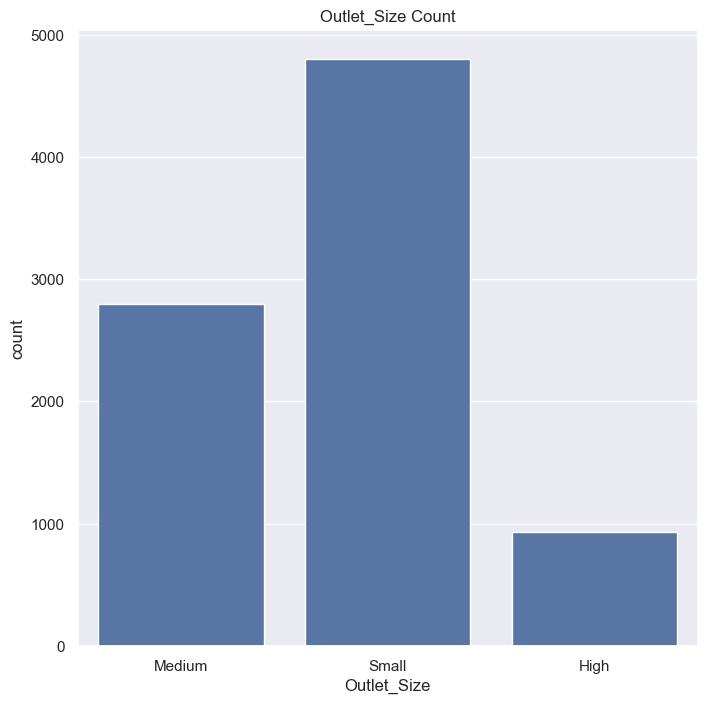

In [122]:
# Outlet Size
plt.figure(figsize=(8,8))
sns.countplot(data=big_mart, x='Outlet_Size')
plt.title('Outlet_Size Count')
plt.show()

Data Preprocessing

In [123]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [124]:
big_mart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [125]:
big_mart.replace({'Item_Fat_Content' : {'low fat': 'Low Fat', 'LF':'Low Fat', 'reg': 'Regular'}}, inplace=True)

In [126]:
big_mart['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [136]:
# Label Encoding to convert categorical feature to numerical one

Encoder = LabelEncoder()

In [128]:
big_mart['Item_Identifier'] = Encoder.fit_transform(big_mart['Item_Identifier'])

big_mart['Item_Fat_Content'] = Encoder.fit_transform(big_mart['Item_Fat_Content'])

big_mart['Item_Type'] = Encoder.fit_transform(big_mart['Item_Type'])

big_mart['Outlet_Identifier'] = Encoder.fit_transform(big_mart['Outlet_Identifier'])

big_mart['Outlet_Size'] = Encoder.fit_transform(big_mart['Outlet_Size'])

big_mart['Outlet_Location_Type'] = Encoder.fit_transform(big_mart['Outlet_Location_Type'])

big_mart['Outlet_Type'] = Encoder.fit_transform(big_mart['Outlet_Type'])

In [129]:
big_mart.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


Splitting Features and Target

In [ ]:
X= big_mart.drop(columns='Item_Outlet_Sales',axis=1)
Y= big_mart['Item_Outlet_Sales']

print(X)
print(Y)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

Train Test Split


In [200]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [201]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


Model Training

In [202]:
model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state = 42)

In [203]:
model.fit(X_train , Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

Model Evaluation

In [204]:
training_prediction = model.predict(X_train)


In [205]:
# R squared error
r_squared = metrics.r2_score(Y_train, training_prediction)

print('R squared error =', r_squared)

R squared error = 0.6488960285377511


In [206]:
test_prediction = model.predict(X_test)

# R squared error for test data
r_squared_test = metrics.r2_score(Y_test, test_prediction)

print('R squared error of test data =', r_squared_test)

R squared error of test data = 0.6027518639218991
